In [1]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath('../../data_processing'))
from process_urls import get_file_urls, process_urls_in_parallel
from utils import plot_polar_data

In [2]:
MiniRF_home = 'https://pds-geosciences.wustl.edu/lro/lro-l-mrflro-5-global-mosaic-v1/lromrf_1001/data/128ppd/'

# Get and print all .lbl file URLs from the given page
MiniRF_urls = get_file_urls(MiniRF_home, '.lbl', 'cpr') # 'cpr' - circular polarisation ratio
print(f"Found {len(MiniRF_urls)} Mini-RF file(s)")

print("Processing Mini-RF file(s)...")
MiniRF_df = process_urls_in_parallel(MiniRF_urls, 'MiniRF')
print("File(s) processed successfully")

Found 1 Mini-RF file(s)
Processing Mini-RF file(s)...
Extracting image data...

lines: 23040, line_samples: 46080
Error converting value to float: PC_REAL
address: IMAGE, bands: 1, sample_bits: 32, sample_type: PC_REAL
Condensed image shape: (691, 46080)
Image data extracted
Error converting value to float: -inf
sample projection offset: 23040.5, line projection offset: 11520.5, samples: 46080, lines: 691, map resolution: 128.0
center_lat: 0.0, center_lon: 0.0, map_resolution: 128.0, min_lat: -90.0, max_lat: 90.0
Lats min: -2.969467750809545, max: -2.7914713709834373
Lats min: -90.0, max: 90.0, Lons min: -154.82349162103003, max: -25.17842328231353
Coordinates generated
Number of Lats between -85 and -90: 921600
Processed 1 images
File(s) processed successfully


Number of NaNs in Mini-RF CPR data: 2372136 out of 5345280 (44.38%)
Min/max longitude: 205.1765, 334.8216
Min/max latitude: -90.0000, 90.0000
Min/max CPR val: 0.0000, 2.0000

          Longitude      Latitude        MiniRF
count  5.345280e+06  5.345280e+06  2.973144e+06
mean   2.699973e+02  5.505792e-04  4.768301e-01
std    4.502639e+01  8.268063e+01  2.848490e-01
min    2.051765e+02 -9.000000e+01  8.377143e-06
25%    2.241279e+02 -8.249943e+01  2.811268e-01
50%    2.699949e+02  1.068115e-03  4.090366e-01
75%    3.158672e+02  8.250056e+01  5.952485e-01
max    3.348216e+02  9.000000e+01  1.999988e+00
Latitude range: 75.1314926147461 to 90.0
Second latitude: 75.1314926147461
Latitude range: -82.17332458496094 to -75.12935638427734
Second latitude: -82.17332458496094
Plotted 2973144 data points


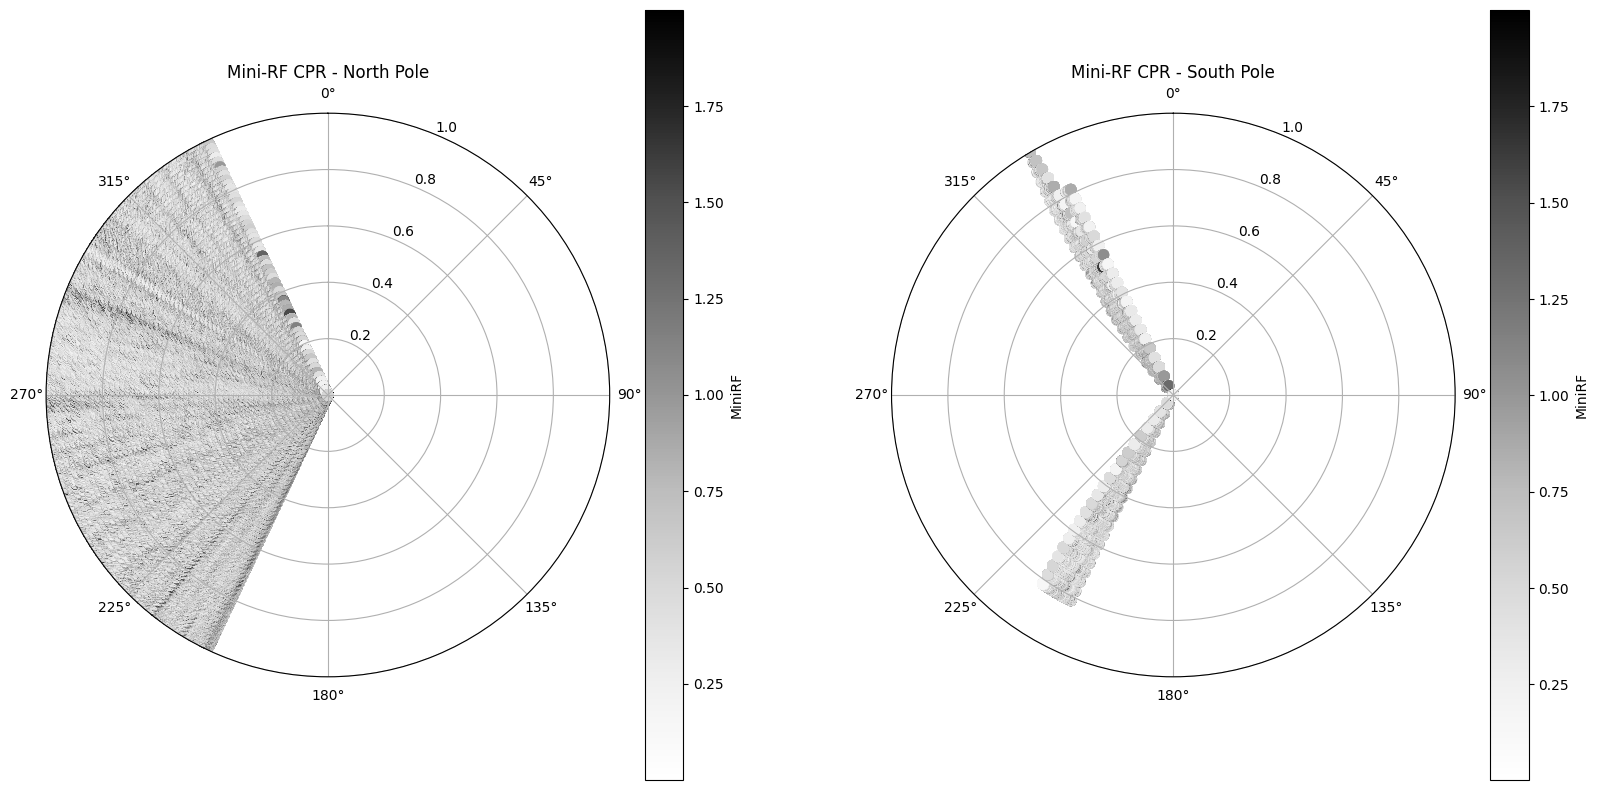

In [3]:
print(f"Number of NaNs in Mini-RF CPR data: {np.isnan(MiniRF_df["MiniRF"]).sum()} out of {np.prod(MiniRF_df["MiniRF"].shape)} ({(np.isnan(MiniRF_df["MiniRF"]).sum()/np.prod(MiniRF_df["MiniRF"].shape)*100):.2f}%)")

print(f'Min/max longitude: {MiniRF_df["Longitude"].min():.4f}, {MiniRF_df["Longitude"].max():.4f}')
print(f'Min/max latitude: {MiniRF_df["Latitude"].min():.4f}, {MiniRF_df["Latitude"].max():.4f}')
print(f'Min/max CPR val: {MiniRF_df["MiniRF"].min():.4f}, {MiniRF_df["MiniRF"].max():.4f}\n')

print(MiniRF_df.describe())

plot_polar_data(MiniRF_df, 'MiniRF', frac=1, random_state=101, title_prefix='Mini-RF CPR')